In [1]:
import numpy as np
import descent
import matplotlib.pyplot as plt
from IPython.html.widgets import interact
%matplotlib inline

/usr/local/lib/python3.5/site-packages/matplotlib-1.5.dev1-py3.5-macosx-10.11-x86_64.egg/matplotlib/__init__.py:867: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/usr/local/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


# Logistic regression

First, we generate a toy problem instance:

In [4]:
# set the random seed
np.random.seed(1234)

# sigmoid
sigmoid = lambda x: 1 / (1 + np.exp(-x))

M = 500  # number of training examples

X = np.random.randn(M,2)       # Features
W = np.array([0.25, -0.5])     # True weights
ytrue = sigmoid(X.dot(W))      # class probabilities

# noisy class labels
yobs = (ytrue + 0.1*np.random.randn(M)) > 0.5
yval = np.ones(yobs.size)*yobs - np.ones(yobs.size)*(~yobs)

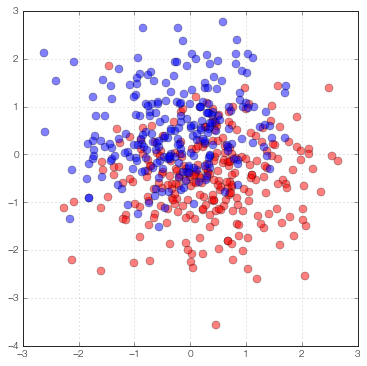

In [11]:
# plot the data and color them by the class label
plt.figure(figsize=(6,6))
plt.plot(X[yobs,0], X[yobs,1], 'ro', alpha=0.5, ms=8)
plt.plot(X[~yobs,0], X[~yobs,1], 'bo', alpha=0.5, ms=8)

The objective function for logistic regression is:

In [12]:
# Objective function for logistic regression
def f_df(theta, X=X, y=yval):
    expval = np.exp(-yval * X.dot(theta))
    
    objective = np.mean(np.log(1 + expval)) + 0.1 * np.linalg.norm(theta)**2
    gradient = np.mean((-yval * expval / (1 + expval)).reshape(-1,1) * X, axis=0) + 0.2*theta
    return objective, gradient

In [25]:
# Let's run gradient descent!
opt = descent.GradientDescent(f_df, np.zeros(2), learning_rate=1e-2)
opt.display.every = 50
opt.run(1000)
#opt.theta

tol: tolerance(obj=1e-18, param=1e-18, grad=1e-16)
+-------------------+--------------------+-------------------+
|Iteration          | Objective          | Iteration runtime |
+-------------------+--------------------+-------------------+
|                50 |            0.65595 |         173.807 μs|
|               100 |            0.63286 |         426.054 μs|
|               150 |            0.61804 |         213.146 μs|
|               200 |            0.60844 |         384.092 μs|
|               250 |            0.60218 |         315.905 μs|
|               300 |            0.59806 |         291.109 μs|
|               350 |            0.59533 |         185.013 μs|
|               400 |            0.59351 |         277.996 μs|
|               450 |            0.59229 |         230.074 μs|
|               500 |            0.59148 |         200.987 μs|
|               550 |            0.59093 |         247.955 μs|
|               600 |            0.59056 |         238.895 μs|
|   

In [32]:
# check the correlation with the true weight vector
corr = np.inner(W, opt.theta)**2 / (np.inner(W,W) * np.inner(opt.theta, opt.theta))
print('Correlation with the true weight vector: {}'.format(corr))

Correlation with the true weight vector: 0.9965624633497236


tol: tolerance(obj=1e-18, param=1e-18, grad=1e-16)


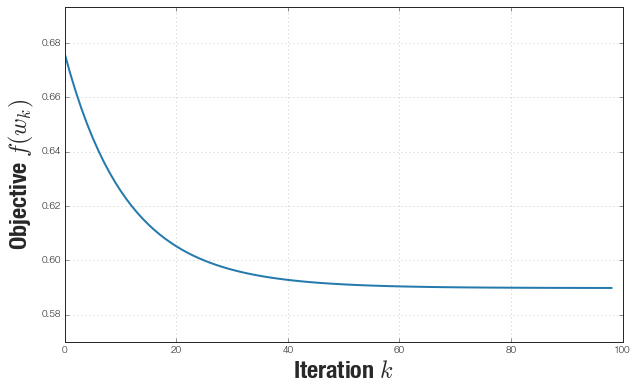

In [34]:
@interact(learning_rate=(0.001, 0.1, 0.01))
def train(learning_rate):
    plt.figure(figsize=(10,6))
    opt = descent.GradientDescent(f_df, np.zeros(2), learning_rate=learning_rate)
    opt.display = None
    opt.run(100)
    plt.plot(opt.storage.get('obj'))
    plt.ylim(0.57, 0.6932)
    plt.xlabel('Iteration $k$', fontsize=24)
    plt.ylabel('Objective $f(w_k)$', fontsize=24)

## Optimizers besides gradient descent

We can compare gradient descent to other algorithms:

tol: tolerance(obj=1e-18, param=1e-18, grad=1e-16)
tol: tolerance(obj=1e-18, param=1e-18, grad=1e-16)
tol: tolerance(obj=1e-18, param=1e-18, grad=1e-16)


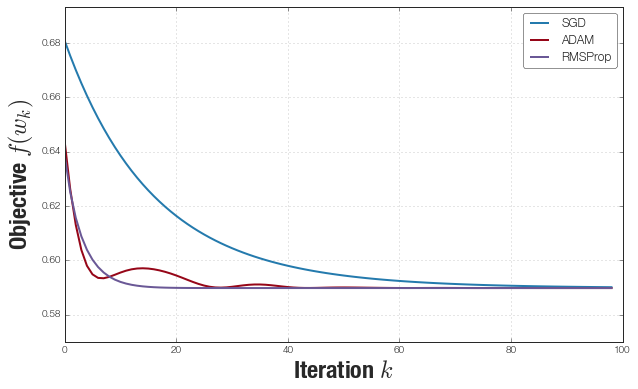

In [36]:
@interact(learning_rate=(0.001, 0.1, 0.01))
def train(learning_rate):
    
    plt.figure(figsize=(10,6))
    opt = descent.GradientDescent(f_df, np.zeros(2), learning_rate=learning_rate)
    opt.display = None
    opt.run(100)
    plt.plot(opt.storage.get('obj'))
    plt.ylim(0.57, 0.6932)
    
    opt = descent.Adam(f_df, np.zeros(2), learning_rate=learning_rate)
    opt.display = None
    opt.run(100)
    plt.plot(opt.storage.get('obj'))
    plt.ylim(0.57, 0.6932)
    
    opt = descent.RMSProp(f_df, np.zeros(2), learning_rate=learning_rate)
    opt.display = None
    opt.run(100)
    plt.plot(opt.storage.get('obj'))
    plt.ylim(0.57, 0.6932)
    
    plt.legend(["SGD", "ADAM", "RMSProp"], loc="upper right",  frameon=True, fancybox=True)
    plt.xlabel('Iteration $k$', fontsize=24)
    plt.ylabel('Objective $f(w_k)$', fontsize=24)